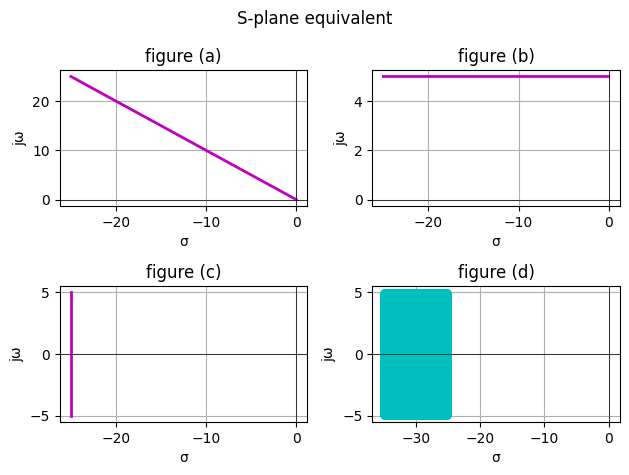

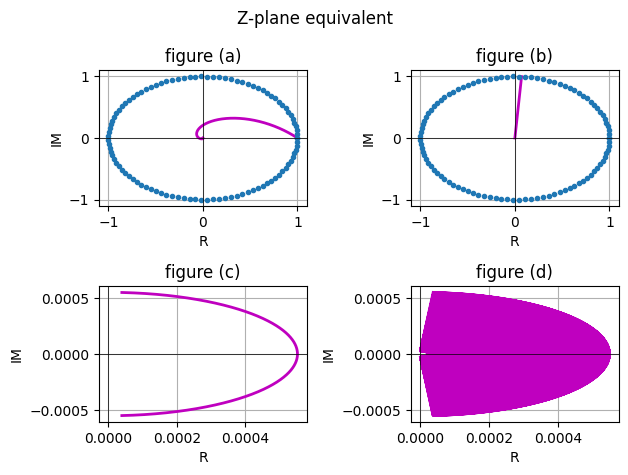

In [8]:
import numpy as np
import matplotlib.pyplot as plt

T = 0.3  # Sampling time

sigma = [np.arange(-25, 0.01, 0.01), np.arange(-25, 0.01, 0.01), -25, np.arange(-35, -25.01, 0.01)]
w = [-sigma[0], 5, np.arange(-5, 5.01, 0.01), np.arange(-5, 5.01, 0.01)]

# Initialize variables to store calculated values
S_values = [None] * len(sigma)
Z_values = [None] * len(sigma)

# Calculate S and Z values
for i in range(len(sigma)):
    if i == 3:  # If fourth graph, use meshgrid
        Sigma, W = np.meshgrid(sigma[i], w[i])
        S_values[i] = Sigma + 1j * W
        Z_values[i] = np.exp(Sigma * T) * (np.cos(W * T) + 1j * np.sin(W * T))
    else:
        S_values[i] = sigma[i] + 1j * w[i]
        Z_values[i] = np.exp(sigma[i] * T) * (np.cos(w[i] * T) + 1j * np.sin(w[i] * T))

# Plot S-plane figures
for i in range(len(sigma)):
    plt.figure(1)
    plt.subplot(2, 2, i + 1)
    if i == 3:
        plt.plot(np.real(S_values[i].ravel()), np.imag(S_values[i].ravel()), '.',color="c")
    else:
        plt.plot(np.real(S_values[i]), np.imag(S_values[i]), linewidth=2,color="m")
    plt.grid(True)
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.xlabel('σ')
    plt.ylabel('jω')
    graphname = f"figure ({chr(ord('a') + i)})"
    plt.title(graphname)
    plt.tight_layout()
    plt.suptitle('S-plane equivalent')

# Plot Z-plane figures
for i in range(len(sigma)):
    plt.figure(2)
    plt.subplot(2, 2, i + 1)
    if i == 3:
        plt.plot(np.real(Z_values[i].ravel()), np.imag(Z_values[i].ravel()), 'm', linewidth=2)
    else:
        plt.plot(np.real(Z_values[i]), np.imag(Z_values[i]), 'm', linewidth=2)
        if np.max(np.abs(np.real(Z_values[i]))) > 0.5 or np.max(np.abs(np.imag(Z_values[i]))) > 0.5:
            theta = np.linspace(0, 2 * np.pi, 100)
            unit_circle = np.exp(1j * theta)
            plt.plot(np.real(unit_circle), np.imag(unit_circle), '.', linewidth=2)
    plt.grid(True)
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.xlabel('R')
    plt.ylabel('IM')
    graphname = f"figure ({chr(ord('a') + i)})"
    plt.title(graphname)
    plt.tight_layout()
    plt.suptitle('Z-plane equivalent')

plt.show()